In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist

In [6]:
(X_train,Y_train), (X_test, y_test)=mnist.load_data()

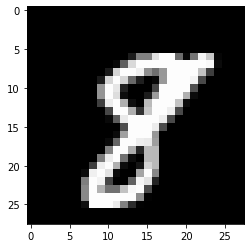

In [7]:
plt.imshow(X_train[55],cmap='gray')

In [8]:
y_test[53]

5

In [9]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [10]:
X=X_test.reshape(-1,28*28)
Y=y_test

In [11]:
X.shape,Y.shape

((10000, 784), (10000,))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
X_=sc.fit_transform(X)

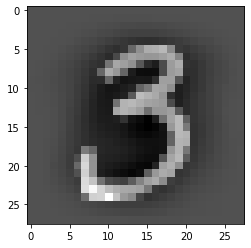

In [15]:
plt.imshow(X_[90].reshape(28,28),cmap='gray')

# Pca Using  SKlearn Llibrary

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=3)

In [18]:
z_pca=pca.fit_transform(X_)

In [19]:
z_pca.shape

(10000, 3)

In [20]:
z_pca

array([[-5.45831023,  6.4134579 , -4.1994837 ],
       [ 2.80443422, -8.02849421, 16.18700146],
       [-7.41124065, -3.8644931 ,  1.08970322],
       ...,
       [-5.00436895,  1.15439793, -5.01703763],
       [-1.42087634, -4.42261801, -7.00678007],
       [13.14271313, -4.26445621, -1.14672595]])

In [21]:
pca.explained_variance_

array([41.39893398, 28.35105735, 27.01964641])

## Custom Pca

In [22]:
import numpy as np

In [23]:
#computing covariance matrix

In [24]:
#trick =X_T*X_=(784,100000)(100000,784)=(784,784)

In [25]:
covariance=np.dot(X_.T,X_)

In [26]:
covariance.shape

(784, 784)

In [27]:
covariance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
#step 3 = computing eigenVectors using SVD

In [29]:
from numpy.linalg import svd

In [30]:
U,S,V=svd(covariance)

In [31]:
U.shape

(784, 784)

In [32]:
Ureduce=U[:,:2]

In [33]:
Ureduce.shape

(784, 2)

In [34]:
#step 4: Projection of data on new axis(components)

In [35]:
z=np.dot(X_,Ureduce)

In [36]:
z.shape

(10000, 2)

In [37]:
z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

In [38]:
z_pca

array([[-5.45831023,  6.4134579 , -4.1994837 ],
       [ 2.80443422, -8.02849421, 16.18700146],
       [-7.41124065, -3.8644931 ,  1.08970322],
       ...,
       [-5.00436895,  1.15439793, -5.01703763],
       [-1.42087634, -4.42261801, -7.00678007],
       [13.14271313, -4.26445621, -1.14672595]])

# Dataset Visulization

In [42]:
new_data=np.hstack((z,Y.reshape(-1,1)))

In [44]:
dataframe=pd.DataFrame(new_data,columns=['pc2','pc1','lables'])

In [46]:
dataframe.head()

,pc2,pc1,lables
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

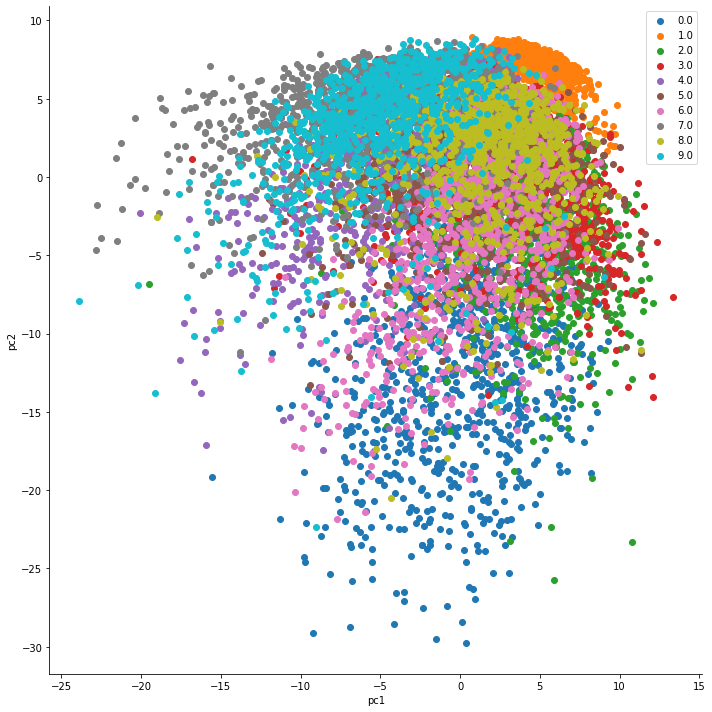

In [49]:
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue='lables',height=10)
fg.map(plt.scatter,'pc1','pc2')
plt.legend()
plt.show()

# PCA with 784